In [7]:
import pickle 
import os
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

O treinamento do algoritmo consiste em encontrar os vetores de suporte. Utilizamos o 

#### Base de dados - Crédito

In [2]:
with open('credit.pkl', 'rb') as file:
    X_treinamento, y_treinamento, X_teste, y_teste = pickle.load(file)
print(f'Treino: {X_treinamento.shape, y_treinamento.shape}')    
print(f'Teste: {X_teste.shape, y_teste.shape}')    

Treino: ((1500, 3), (1500,))
Teste: ((500, 3), (500,))


O parâmetro C controla o *trade-off*  entre **maximizar a margem de separação e minimizar o erro de classificação**. Um valor de C menor resulta em uma margem maior, mas pode permitir mais classificações incorretas (overfitting). Um valor de C maior resulta em uma margem menor, com menos classificações incorretas, mas pode resultar em overfitting.

In [14]:
# instanciar o modelo
svm_credit = SVC(kernel='rbf', random_state=1, C=10.0)

In [15]:
# Treinar
svm_credit.fit(X_treinamento, y_treinamento)

SVC(C=10.0, random_state=1)

In [16]:
y_pred = svm_credit.predict(X_teste)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

0.988

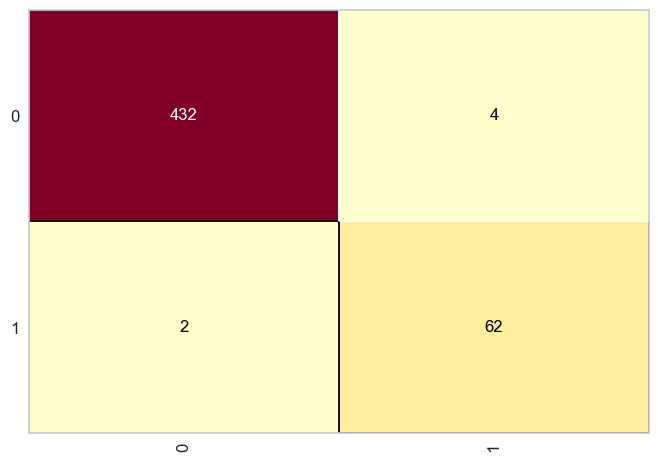

In [17]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X=X_treinamento, y=y_treinamento)
cm.score(X_teste, y_teste)

In [19]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       436
           1       0.94      0.97      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.98      0.97       500
weighted avg       0.99      0.99      0.99       500



Melhores resultados obtido até agora para essa base.

#### Base de dados - Censo

In [21]:
with open('census.pkl', 'rb') as file:
    X_treinamento, y_treinamento, X_teste, y_teste = pickle.load(file)
print(f'Treino: {X_treinamento.shape, y_treinamento.shape}')    
print(f'Teste: {X_teste.shape, y_teste.shape}')    

Treino: ((27676, 108), (27676,))
Teste: ((4885, 108), (4885,))


In [24]:
# instanciar o modelo
svm_census = SVC(kernel='linear', random_state=1)

# Treinar
svm_census.fit(X_treinamento, y_treinamento)

y_pred = svm_census.predict(X_teste)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

0.8507676560900717

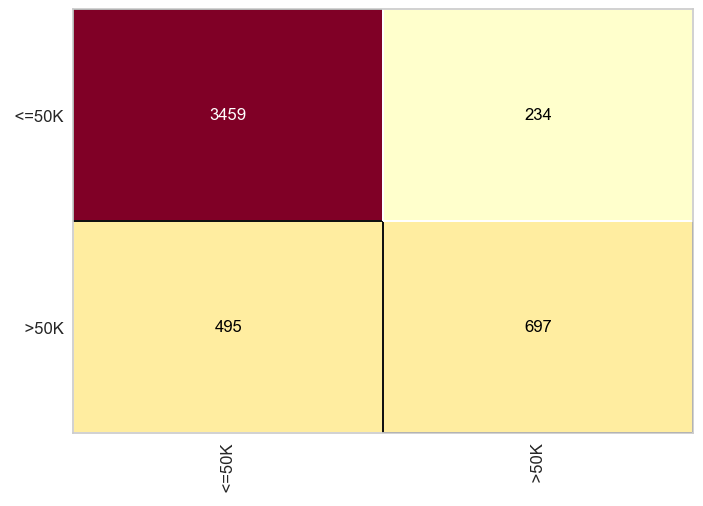

In [26]:
cm = ConfusionMatrix(svm_census)
cm.fit(X=X_treinamento, y=y_treinamento)
cm.score(X_teste, y_teste)

In [27]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



58% de identificação do registros que ganham $>50K$ - Resultado continua ruim.